## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
    
    def __init__(self, K = 3, max_iters = 100, plot_steps = False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        # List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        
        # The Centers (mean vector) for each cluster
        self.centroids = []
        
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # Initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # Optimize clusters
        for _ in range(self.max_iters):
            
            # Assign sample to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
            
            # Calculate new centroids from clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self._is_converged(centroids_old, self.centroids):
                break
                
            if self.plot_steps:
                self.plot()
                
                
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
            
    def _get_cluster_labels(self, clusters):
        # Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    
    
    def _is_converged(self, centroids_old, centroids):
        # Distance between old and new centroids, for all centroid
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def _get_centroids(self, clusters):
        # Assign the mean value of the clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis = 0)
            centroids[cluster_idx] = cluster_mean
        return centroids
        
        
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # Distance of the current sample to each centroid
        distances = [euclidean_distance(sample, centroid) for centroid in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    

    def plot(self):
        fig, ax = plt.subplots(figsize = (12,8))
        
        # Plot the clusters
        for i, index in enumerate(self.clusters):
            points = self.X[index].T
            ax.scatter(points[0], points[1], s=30, label=f"Cluster {i+1}")
    
        # Plot the centroids
        for point in self.centroids:
            ax.scatter(point[0], point[1], s=100, c='black', marker='x')
        
        plt.show()

## Now take the blob dataset from Sklearn and Train the Model

from sklearn.datasets import make_blobs
X, y = make_blobs(centers = 3, n_samples = 500, n_features = 2, shuffle = True, random_state = 40)
print('X shape :',X.shape)
clusters = len(np.unique(y))
print('Clusters :', clusters)

### Make Prediction via Model

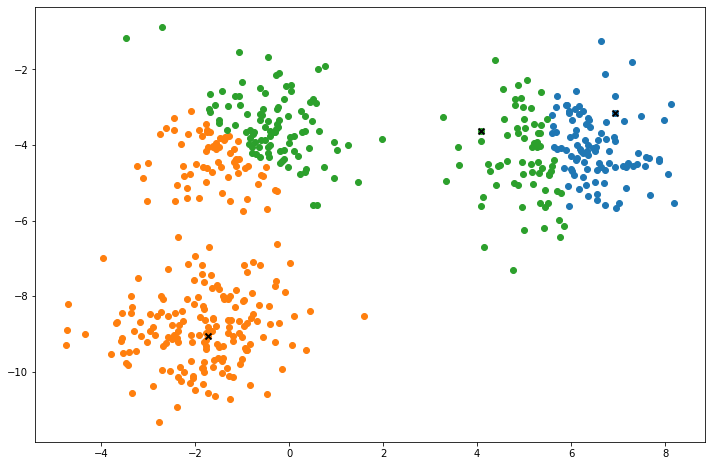

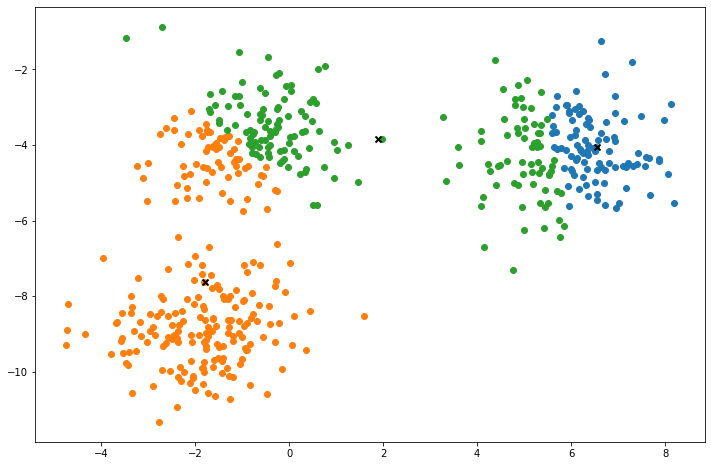

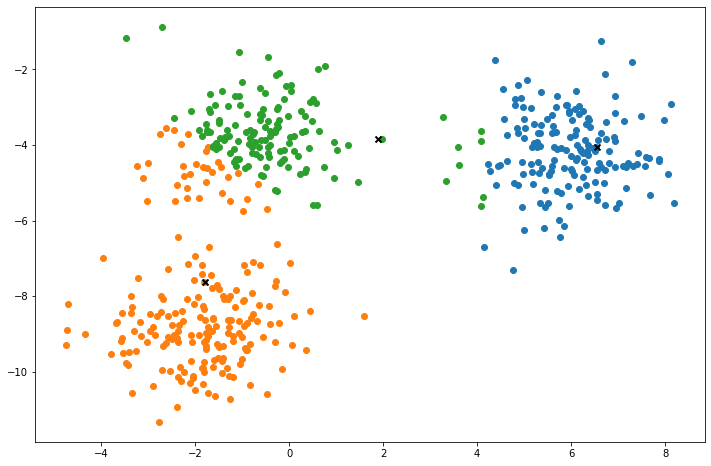

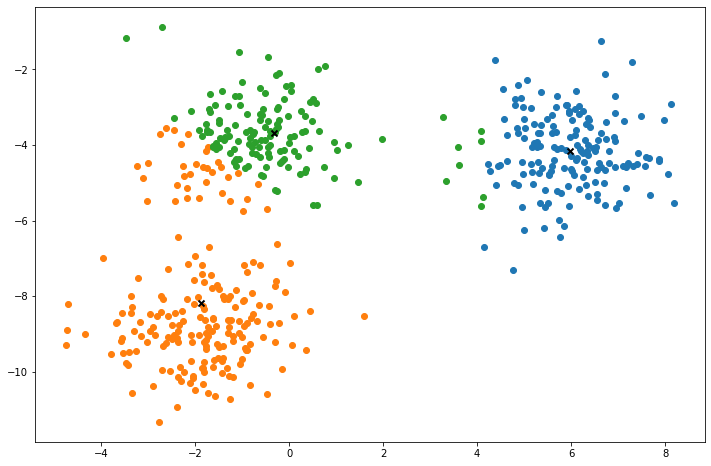

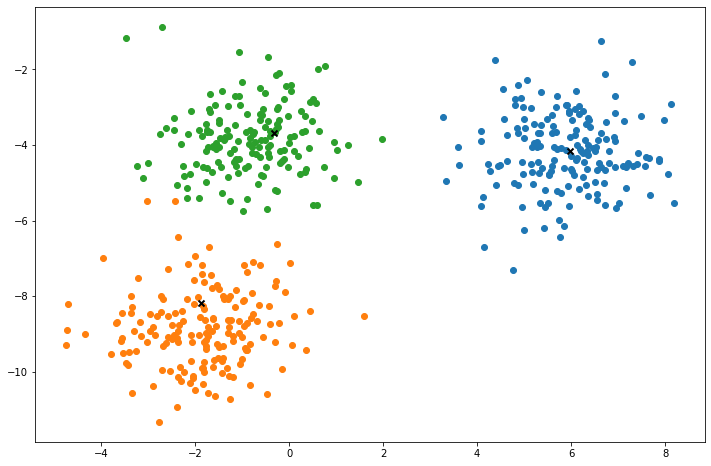

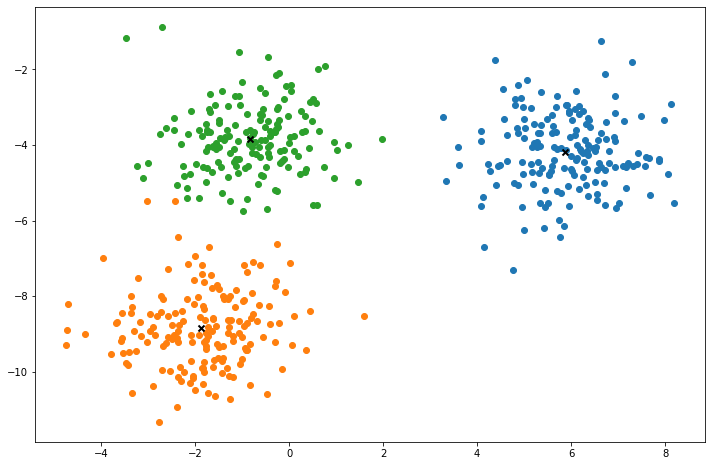

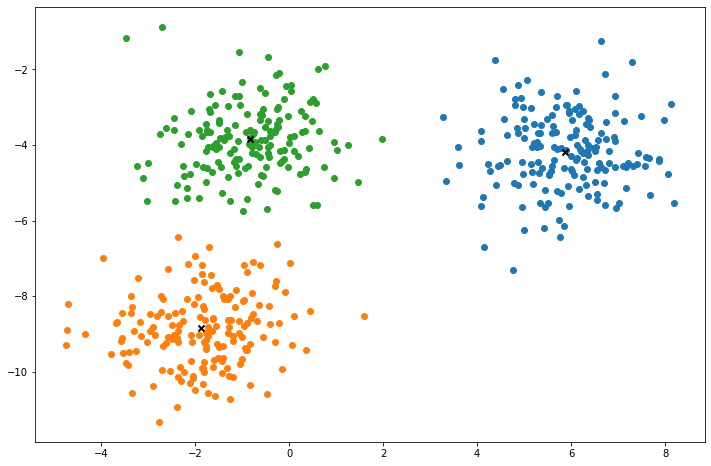

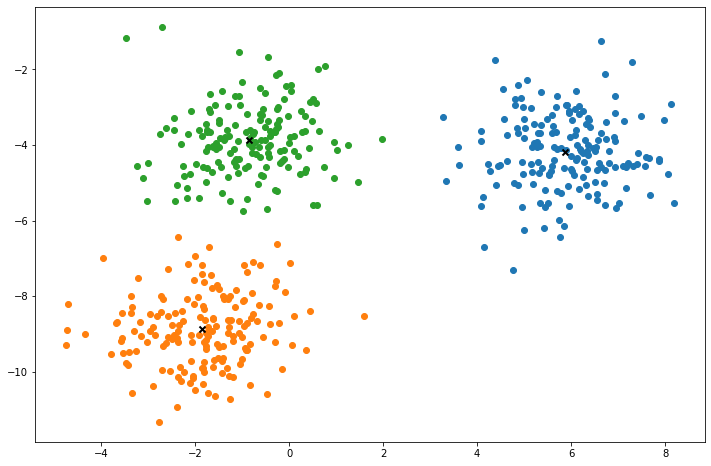

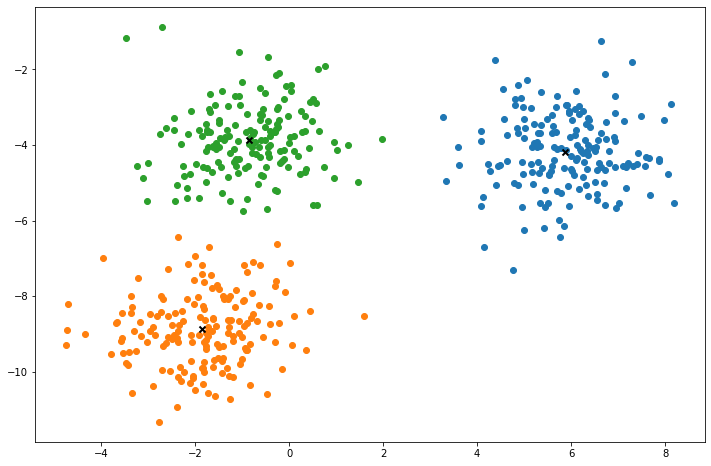

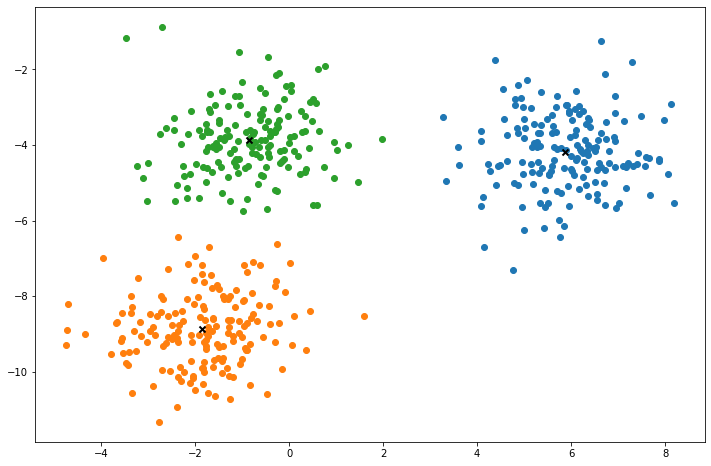

In [13]:
k = KMeans(K = clusters, max_iters = 150, plot_steps = True)
y_pred = k.predict(X)

k.plot()

### Now lets Try Real Dataset

In [28]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
dataset = pd.get_dummies(dataset)
dataset.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [36]:
X = dataset.iloc[:,1:].values
print('X shape', X.shape)
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

X shape (200, 5)


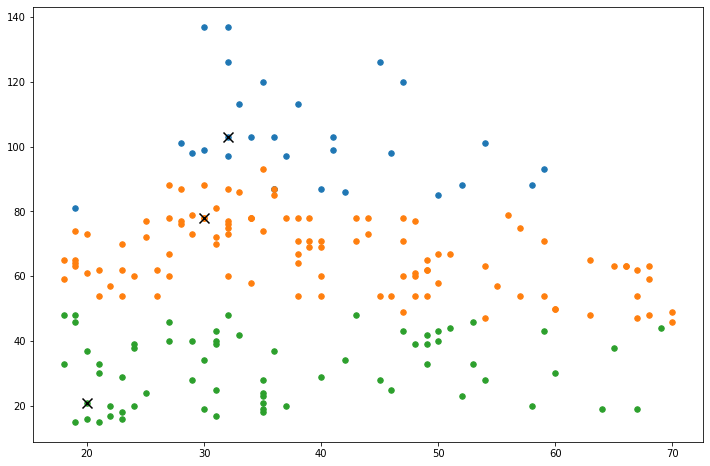

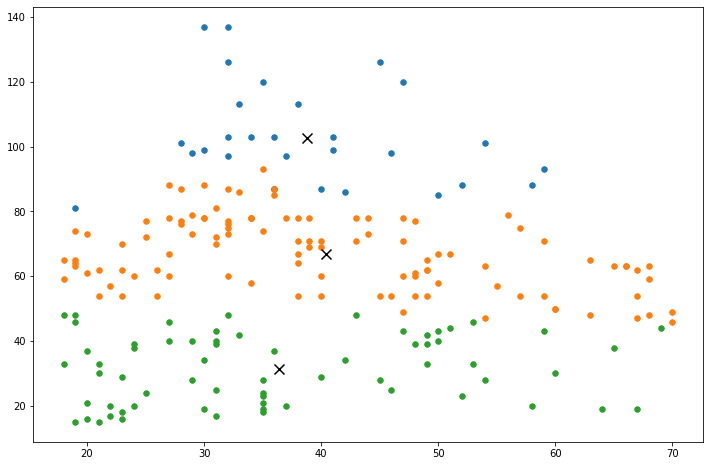

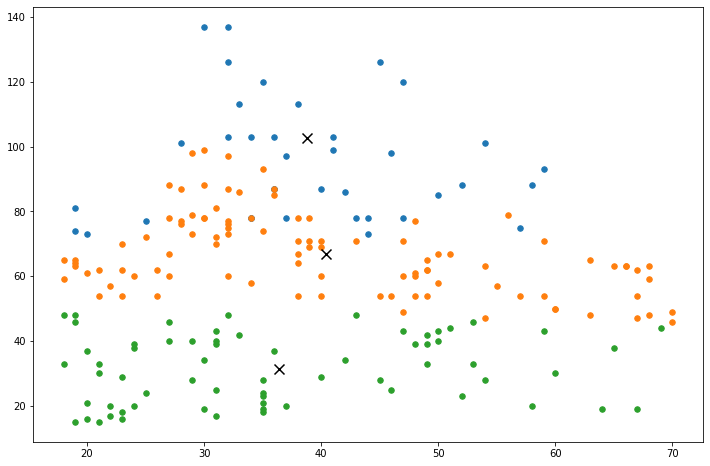

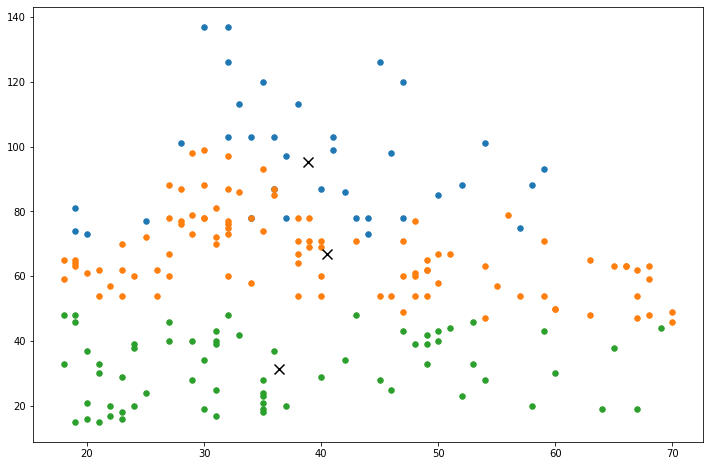

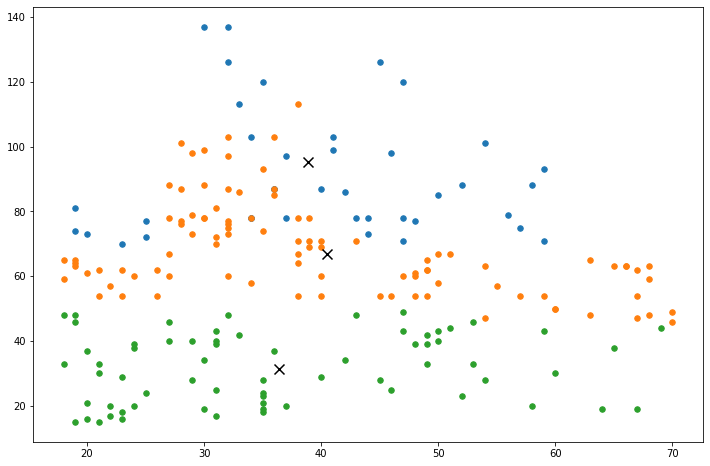

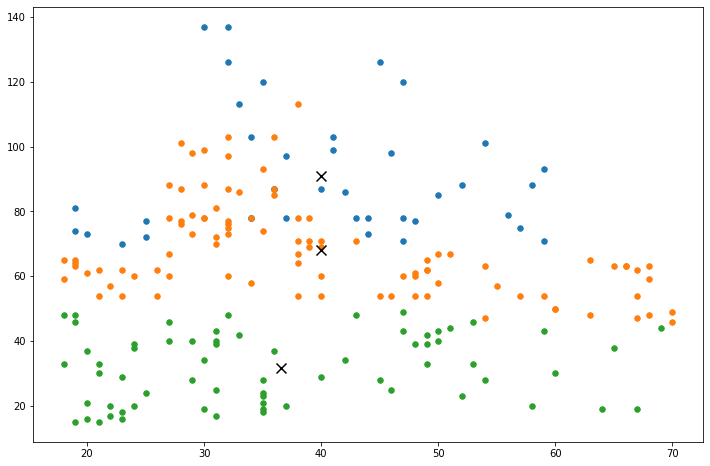

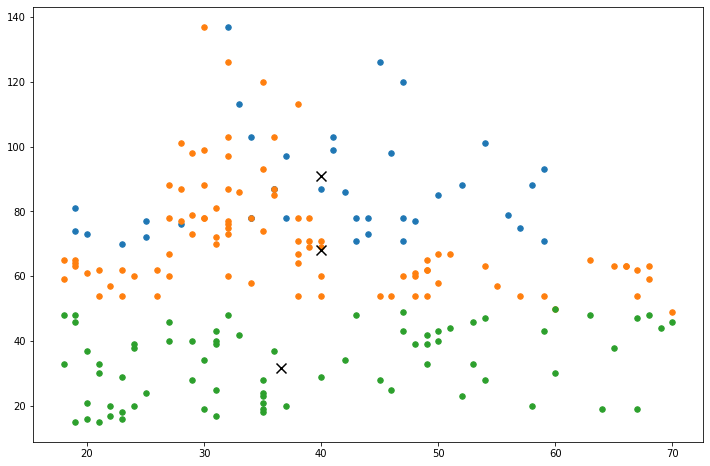

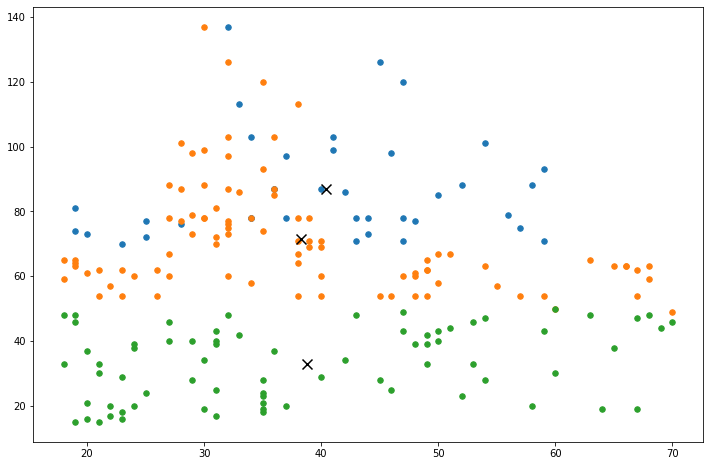

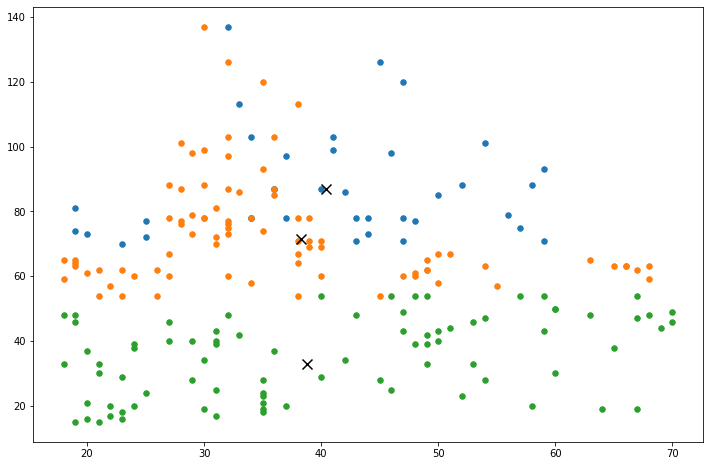

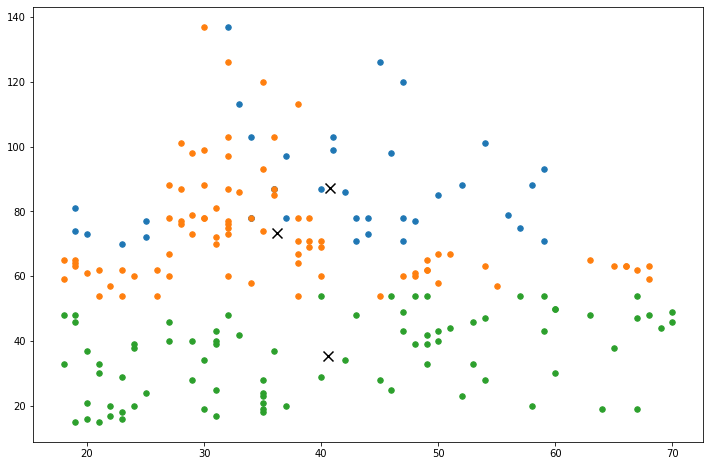

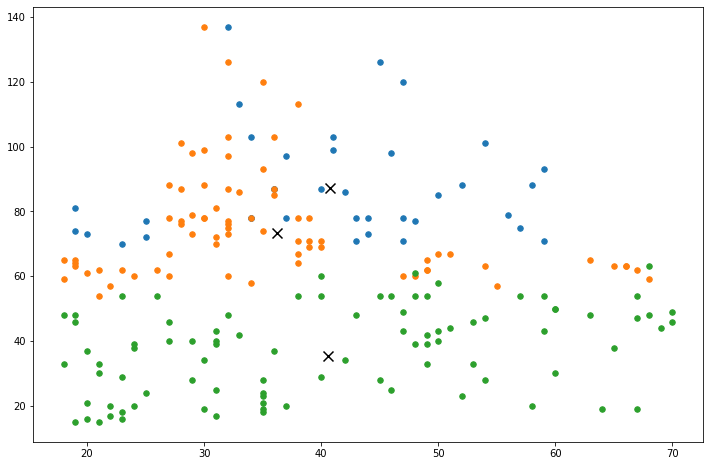

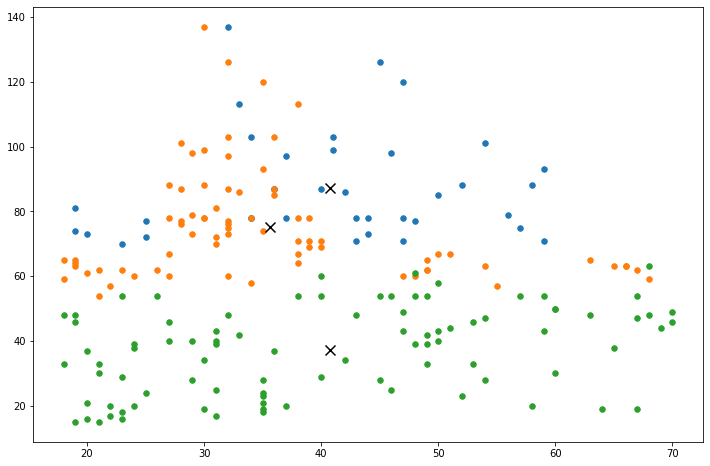

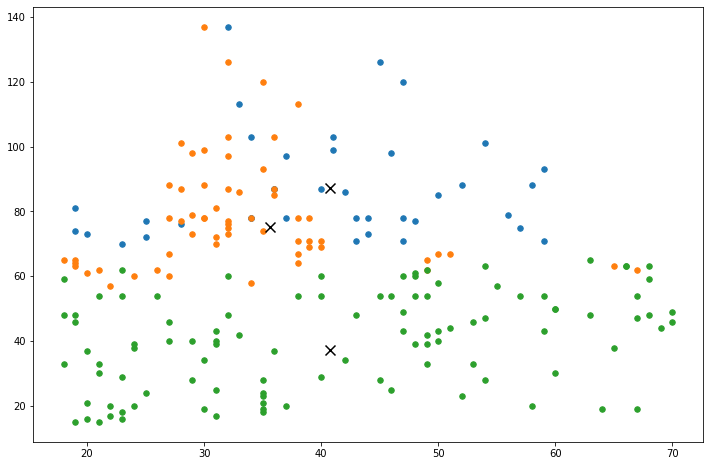

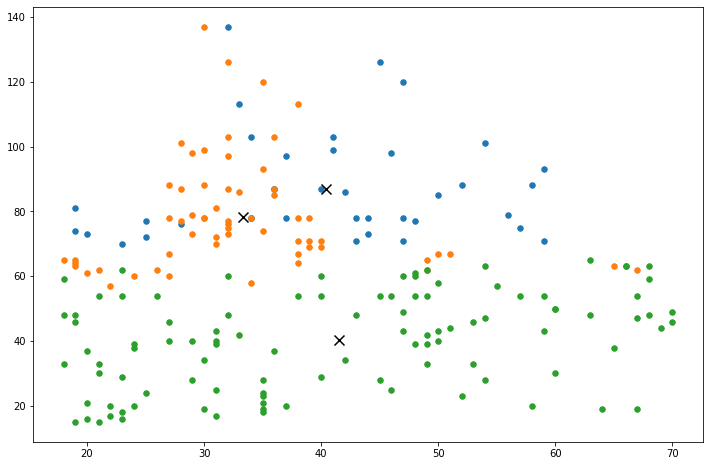

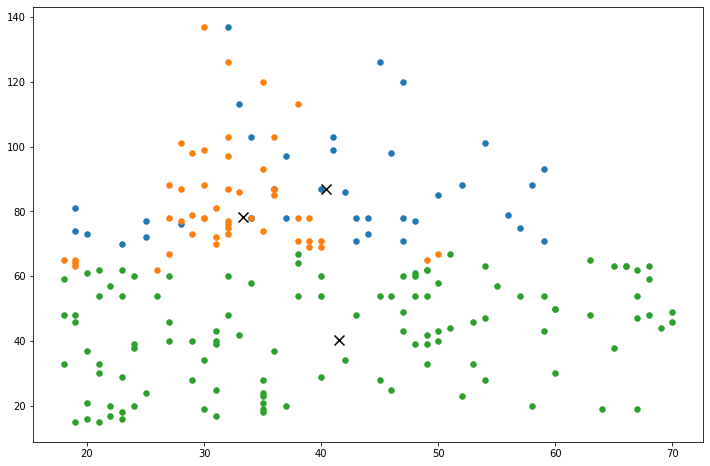

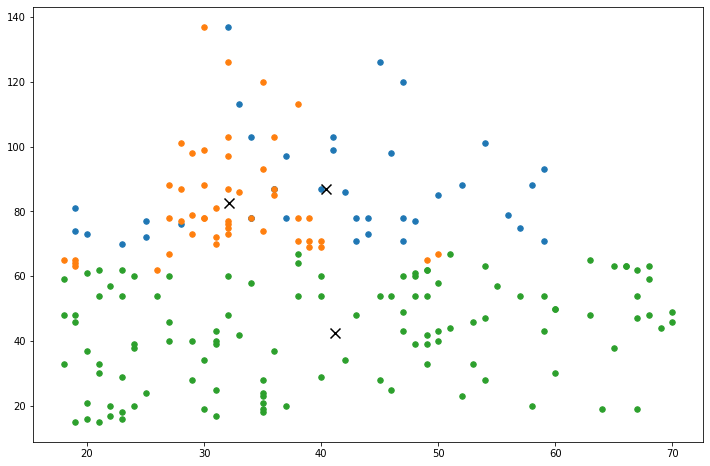

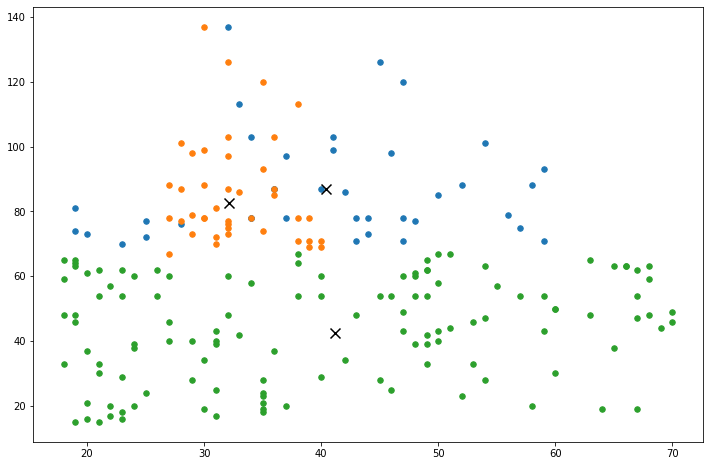

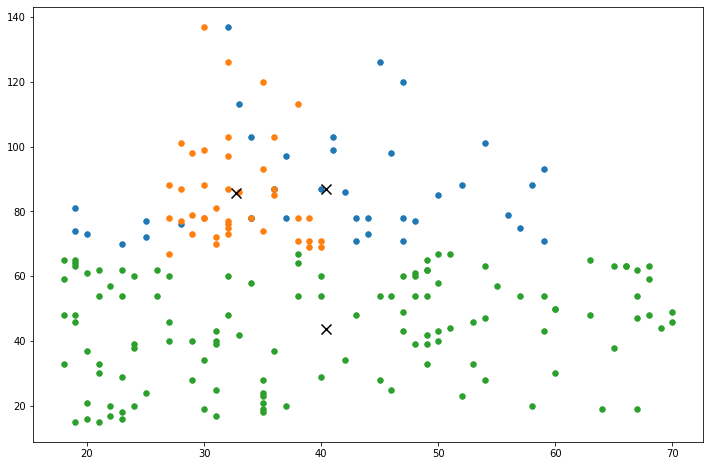

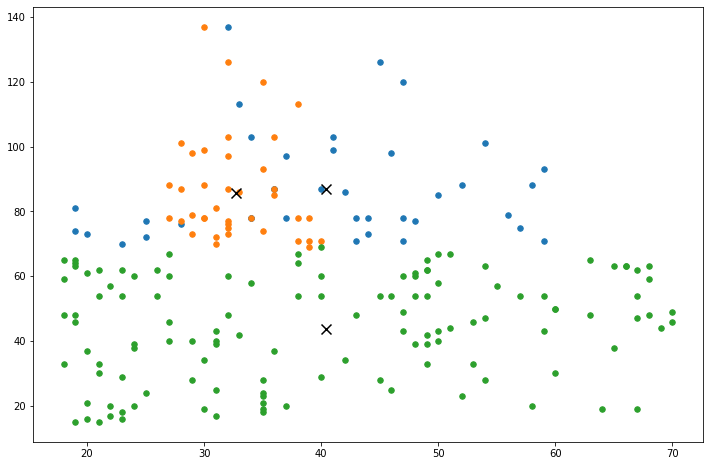

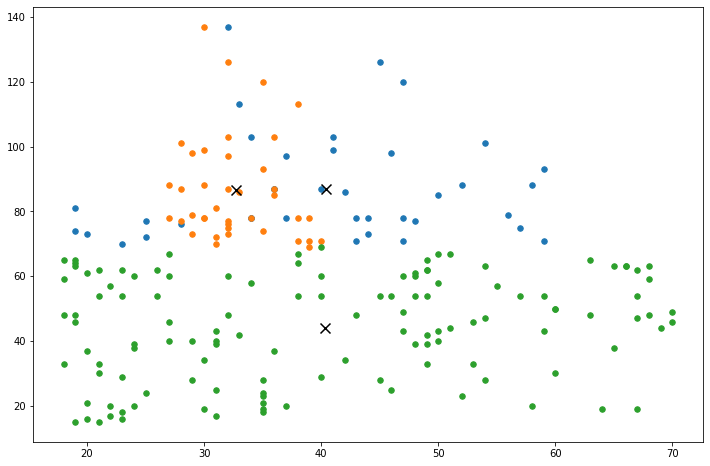

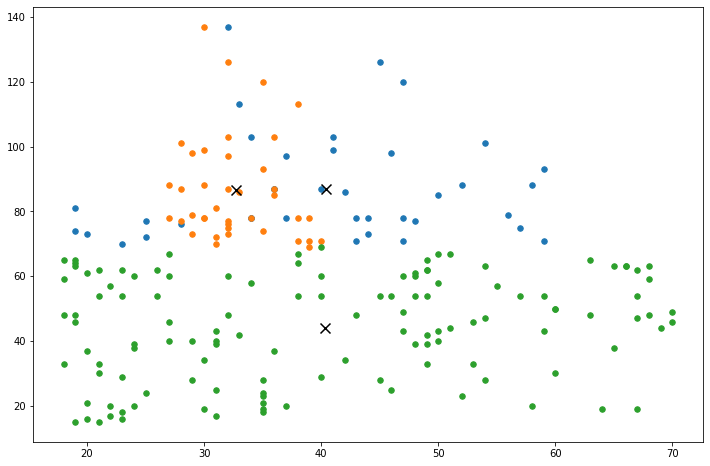

In [39]:
k = KMeans(K=3, max_iters = 250, plot_steps = True)
preds = k.predict(X)